<a href="https://colab.research.google.com/github/Dushyanttara/colab_research/blob/master/AutoSklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
!sudo apt-get install build-essential swig
!curl https://raw.githubusercontent.com/automl/auto-sklearn/master/requirements.txt | xargs -n 1 -L 1 pip install
!pip install auto-sklearn

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
swig is already the newest version (3.0.12-1).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   194  100   194    0     0    577      0 --:--:-- --:--:-- --:--:--   577


In [0]:
from __future__ import print_function
import sys,tempfile, urllib, os
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

In [0]:
OUTPUT_FILE = '/content/churn_data.csv'

In [0]:
churn_df = pd.read_csv(OUTPUT_FILE)

In [7]:
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Auto sklearn does not do any data preprocessing


In [9]:
churn_df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [0]:
churn_df = churn_df.replace(r'^\s$', np.nan, regex = True)
churn_df.iloc[:,19] = pd.to_numeric(churn_df.iloc[:,19], errors = 'coerce')

from sklearn.impute import SimpleImputer
imp_median = SimpleImputer(missing_values = np.nan, strategy = 'median')
churn_df.iloc[:,19] = imp_median.fit_transform(churn_df.iloc[:,19].values.reshape(-1,1))

In [0]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder


categorical_columns = ['gender', 'Partner', 'Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']

column_trans = make_column_transformer((OrdinalEncoder(), categorical_columns))

churn_transformed = column_trans.fit_transform(churn_df)

In [0]:
churn_df_trans = churn_df.copy()
churn_df_trans = pd.DataFrame(churn_transformed, columns = categorical_columns).astype(int)

In [0]:
churn_df.update(churn_df_trans)

In [17]:
churn_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,2234-XADUH,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,4801-JZAZL,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,8361-LTMKD,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [0]:
churn_df_X = churn_df.copy()
churn_df_y =  churn_df_X.pop('Churn')

In [0]:
churn_df_y

In [20]:
churn_df_X.pop("customerID")

0       7590-VHVEG
1       5575-GNVDE
2       3668-QPYBK
3       7795-CFOCW
4       9237-HQITU
           ...    
7038    6840-RESVB
7039    2234-XADUH
7040    4801-JZAZL
7041    8361-LTMKD
7042    3186-AJIEK
Name: customerID, Length: 7043, dtype: object

In [0]:
churn_df_y=pd.to_numeric(churn_df_y).astype(int)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(churn_df_X, churn_df_y, train_size=0.75, test_size=0.25)

In [0]:
#feature_types = (['categorical'] * 4) + (['numerical'] * 1) + (['categorical'] * 12) + (['numerical'] * 2)
#feature_types

In [0]:
import autosklearn.classification

In [0]:
automl = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=120, per_run_time_limit=30, n_jobs=2,
    include_estimators=["random_forest", "sgd", ], exclude_estimators=None, include_preprocessors=["no_preprocessing", ], exclude_preprocessors=None) #time limit in seconds, preprocessing is for PCA etc

In [28]:
automl.fit(X_train, y_train) 

[WARNING] [2020-03-16 15:43:20,521:EnsembleBuilder(1791095845):18c25d6645a590c944f7f50c127b3cbf] No models better than random - using Dummy Score!
[WARNING] [2020-03-16 15:43:20,541:EnsembleBuilder(1791095845):18c25d6645a590c944f7f50c127b3cbf] No models better than random - using Dummy Score!


AutoSklearnClassifier(delete_output_folder_after_terminate=False,
                      delete_tmp_folder_after_terminate=False,
                      disable_evaluator_output=False,
                      ensemble_memory_limit=1024, ensemble_nbest=50,
                      ensemble_size=50, exclude_estimators=None,
                      exclude_preprocessors=None, get_smac_object_callback=None,
                      include_estimators=['random_forest', 'sgd'],
                      include_preprocessors=['no_preprocessing'],
                      initial_configurations_via_metalearning=25,
                      logging_config=None, metadata_directory=None,
                      ml_memory_limit=3072, n_jobs=2, output_folder=None,
                      per_run_time_limit=30, resampling_strategy='holdout',
                      resampling_strategy_arguments=None, seed=1,
                      shared_mode=False, smac_scenario_args=None,
                      time_left_for_this_task=120, tm

In [0]:
print(automl.show_models())

In [30]:
print(automl.sprint_statistics())

auto-sklearn results:
  Dataset name: 18c25d6645a590c944f7f50c127b3cbf
  Metric: accuracy
  Best validation score: 0.804472
  Number of target algorithm runs: 117
  Number of successful target algorithm runs: 116
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 1
  Number of target algorithms that exceeded the memory limit: 0



In [33]:
automl.cv_results_['params'][np.argmax(automl.cv_results_['mean_test_score'])]

{'balancing:strategy': 'none',
 'categorical_encoding:__choice__': 'one_hot_encoding',
 'categorical_encoding:one_hot_encoding:minimum_fraction': 0.00015379825781811575,
 'categorical_encoding:one_hot_encoding:use_minimum_fraction': 'True',
 'classifier:__choice__': 'random_forest',
 'classifier:random_forest:bootstrap': 'True',
 'classifier:random_forest:criterion': 'entropy',
 'classifier:random_forest:max_depth': 'None',
 'classifier:random_forest:max_features': 0.5117442592713467,
 'classifier:random_forest:max_leaf_nodes': 'None',
 'classifier:random_forest:min_impurity_decrease': 0.0,
 'classifier:random_forest:min_samples_leaf': 5,
 'classifier:random_forest:min_samples_split': 12,
 'classifier:random_forest:min_weight_fraction_leaf': 0.0,
 'classifier:random_forest:n_estimators': 100,
 'imputation:strategy': 'median',
 'preprocessor:__choice__': 'no_preprocessing',
 'rescaling:__choice__': 'minmax'}

In [0]:
predictions = automl.predict(X_test)

In [37]:
import sklearn.metrics
print("Accuracy score", sklearn.metrics.accuracy_score(y_test, predictions))

Accuracy score 0.794434980124929


In [0]:
import pickle
x = automl.show_models()
results = {"ensemble" : x}
pickle.dump(results, open('churn.pickle', 'wb'))

In [40]:
!ls *.pickle

churn.pickle


In [41]:
np.bincount(predictions)

array([1435,  326])

In [42]:
np.bincount(y_test)

array([1289,  472])

In [43]:
max(y_test.mean(), 1- y_test.mean())

0.7319704713231119

In [44]:
print(sklearn.metrics.confusion_matrix(y_test, predictions))

[[1181  108]
 [ 254  218]]


In [0]:
import seaborn as sn
import matplotlib.pyplot as plt


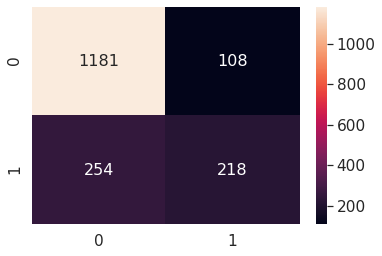

In [46]:
sn.set(font_scale = 1.4)
sn.heatmap(pd.DataFrame(sklearn.metrics.confusion_matrix(y_test,predictions)), annot = True, annot_kws={"size": 16}, fmt = '')
plt.show()

In [47]:
print(sklearn.metrics.precision_score(y_test, predictions))

0.6687116564417178


In [48]:
print(sklearn.metrics.recall_score(y_test, predictions))

0.461864406779661
